Create a machine learning model to predict revenue of the restaurant based on the features present in the dataset.
In this project, you have to predict the restaurant revenue based on the independent features using a machine learning 
algorithm of your own choice.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r'revenue_prediction.csv')
df.head()

,Id,Name,Franchise,Category,City,No_Of_Item,Order_Placed,Revenue
0,101,HungryHowie'sPizza,Yes,Mexican,Bengaluru,55,5.5,5953753
1,102,CharleysPhillySteaks,No,Varied Menu,Gurugram,72,6.8,7223131
2,103,Chuy's,Yes,Chicken,Pune,25,1.9,2555379
3,104,O'Charley's,Yes,Italian/Pizza,Mumbai,18,2.5,2175511
4,105,PolloTropical,Yes,Pizza,Noida,48,4.2,4816715


In [4]:
df.shape

(100, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            100 non-null    int64  
 1   Name          100 non-null    object 
 2   Franchise     100 non-null    object 
 3   Category      100 non-null    object 
 4   City          100 non-null    object 
 5   No_Of_Item    100 non-null    int64  
 6   Order_Placed  100 non-null    float64
 7   Revenue       100 non-null    int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 6.4+ KB


In [6]:
df.describe()

,Id,No_Of_Item,Order_Placed,Revenue
count,100.000000,100.000000,100.000000,1.000000e+02
mean,150.500000,49.080000,4.086000,4.395161e+06
std,29.011492,22.370923,2.055101,2.659932e+06
min,101.000000,18.000000,1.000000,8.498700e+05
25%,125.750000,34.750000,2.750000,2.688328e+06
50%,150.500000,45.000000,3.650000,3.911401e+06
75%,175.250000,57.250000,5.100000,5.330084e+06
max,200.000000,126.000000,13.000000,1.969694e+07


In [7]:
df.isna().sum()

Id              0
Name            0
Franchise       0
Category        0
City            0
No_Of_Item      0
Order_Placed    0
Revenue         0
dtype: int64

C:\Users\Sravanthi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


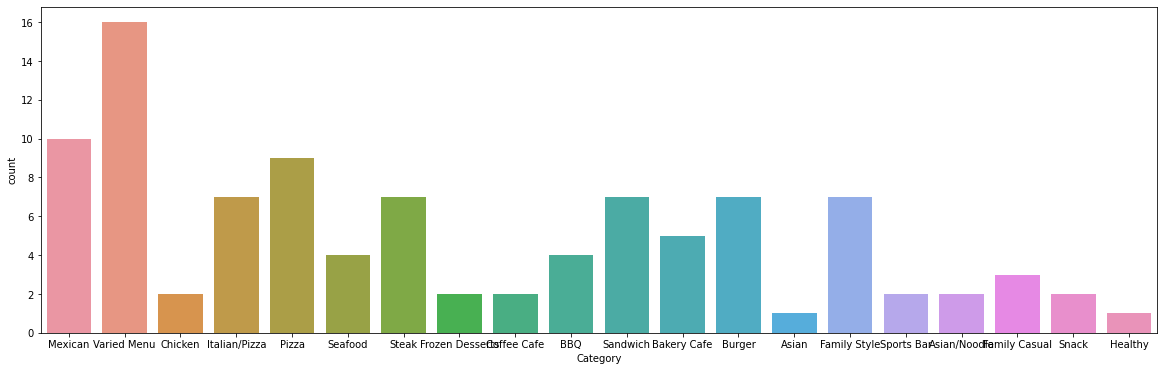

In [8]:
plt.figure(figsize = (20,6))
sns.countplot(df['Category'])
plt.show()

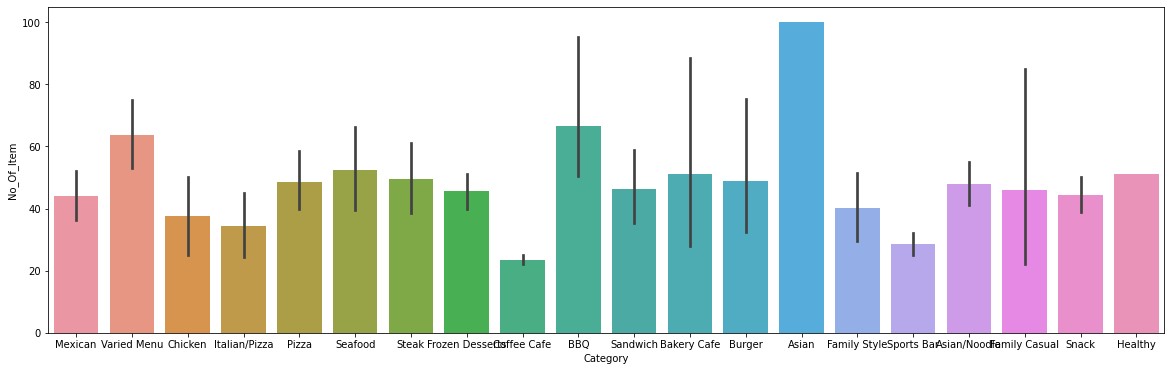

In [9]:
plt.figure(figsize = (20,6))
sns.barplot(x = df['Category'] , y = df['No_Of_Item'])
plt.show()

C:\Users\Sravanthi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


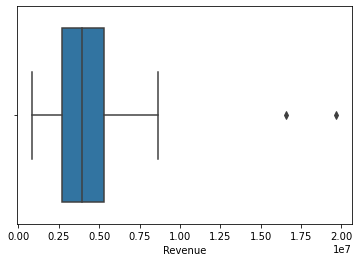

In [10]:
sns.boxplot(df['Revenue'])
plt.show()

C:\Users\Sravanthi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


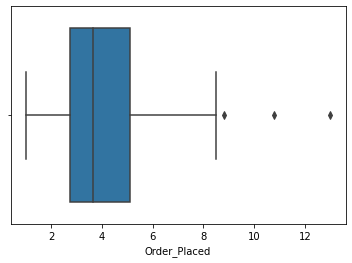

In [11]:
sns.boxplot(df['Order_Placed'])
plt.show()

C:\Users\Sravanthi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


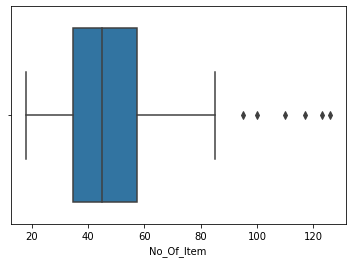

In [12]:
sns.boxplot(df['No_Of_Item'])
plt.show()

In [13]:
Q1 = df.No_Of_Item.quantile(0.25)
Q3 = df.No_Of_Item.quantile(0.75)
IQR = Q3 - Q1
df = df[(df.No_Of_Item >= Q1 - 1.5*IQR) & (df.No_Of_Item <= Q3 + 1.5*IQR)]

Q1 = df.Revenue.quantile(0.25)
Q3 = df.Revenue.quantile(0.75)
IQR = Q3 - Q1
df = df[(df.Revenue >= Q1 - 1.5*IQR) & (df.Revenue <= Q3 + 1.5*IQR)]

Q1 = df.Order_Placed.quantile(0.25)
Q3 = df.Order_Placed.quantile(0.75)
IQR = Q3 - Q1
df = df[(df.Order_Placed >= Q1 - 1.5*IQR) & (df.Order_Placed <= Q3 + 1.5*IQR)]



In [14]:
df.shape

(94, 8)

In [15]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Name'] = le.fit_transform(df['Name'])
df['Franchise'] = le.fit_transform(df['Franchise'])
df['Category'] = le.fit_transform(df['Category'])
df['City'] = le.fit_transform(df['City'])

In [16]:
df.head()

,Id,Name,Franchise,Category,City,No_Of_Item,Order_Placed,Revenue
0,101,39,1,11,0,55,5.5,5953753
1,102,14,0,18,1,72,6.8,7223131
2,103,16,1,4,4,25,1.9,2555379
3,104,59,1,10,2,18,2.5,2175511
4,105,67,1,12,3,48,4.2,4816715


In [17]:
x = df.iloc[: , :-1]
y = df['Revenue']

In [18]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2 , random_state = 42)

In [19]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(75, 7)
(19, 7)
(75,)
(19,)


In [20]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train,y_train)
pred = lr.predict(x_test)
pred

array([2921425.02204266, 3642646.20142251, 3381548.54053216,
       3709292.17247783, 6025621.63244523, 3430573.66260484,
       5230462.37229383, 2430037.53711447, 3659654.65249767,
       8037337.28691361, 1864747.59209315, 5397907.14258251,
       6747567.30847151, 3912942.17416182, 1996919.21993329,
       4358131.36094996, 5877421.6725063 , 2026991.60599048,
       4810009.64337476])

In [21]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

print(r2_score(y_test , pred))
print(mean_absolute_error(y_test , pred))
mse = mean_squared_error(y_test , pred)
rmse = np.sqrt(mse)
rmse

0.9239739473379543
336471.57288453745


431425.1584767308

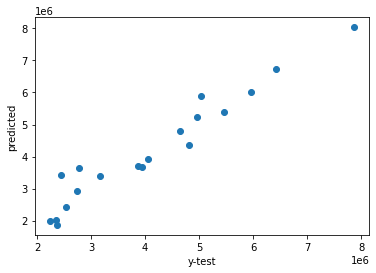

In [28]:
plt.scatter(y_test , pred)
plt.xlabel('y-test')
plt.ylabel('predicted')
plt.show()